In [8]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [9]:
%matplotlib inline

In [10]:
from google.cloud import bigquery


In [11]:
client=bigquery.Client('superb-heaven-319305')


In [12]:
#data=client.get_dataset('superb-heaven-319305.Fraud') #it consider at the time of client
data=client.get_dataset('Fraud')
data.dataset_id

'Fraud'

In [14]:
dataset_id="{}.newdataset".format("superb-heaven-319305")
client.create_dataset(dataset_id,exists_ok=True)

Dataset(DatasetReference('superb-heaven-319305', 'newdataset'))

In [16]:
#create dataset

client.create_dataset('superb-heaven-319305.newdataset1')

Dataset(DatasetReference('superb-heaven-319305', 'newdataset1'))

In [88]:
#delete dataset

#bq.delete_dataset('newdataset',not_found_ok=True)
#bq.delete_dataset('{}.newdataset'.format('superb-heaven-319305'), not_found_ok=True)
bq.delete_dataset('superb-heaven-319305.newdataset')

In [77]:
tables=bq.list_tables('superb-heaven-319305.Fraud')
for table in tables:
    print(table.table_id)

transactions


In [21]:
#create table
bq=bigquery.Client()
bq.create_table('superb-heaven-319305.Fraud.credit')

Table(TableReference(DatasetReference('superb-heaven-319305', 'Fraud'), 'credit'))

In [20]:
#delete data
bq.delete_table("superb-heaven-319305.Fraud.credit")

In [23]:
table=bq.get_table("superb-heaven-319305.Fraud.credit")

In [24]:
#define schema of the table

schema=[bigquery.SchemaField("name", "string", mode="required"),
        bigquery.SchemaField("tansaction_amount","integer",mode="required"),
        bigquery.SchemaField("available_balance","integer",mode="required")
       ]
table.schema=schema
bq.update_table(table,["schema"])

Table(TableReference(DatasetReference('superb-heaven-319305', 'Fraud'), 'credit'))

In [26]:
#insert data into data

row=[("rohit",500,2000),
     ("shruti",200,1500)
    ]
error=bq.insert_rows(table,row)
print(error)

[]


In [27]:
#run sql query with client python library

sql="select * from Fraud.credit "
data=client.query(sql).to_dataframe()
data.head()

,name,tansaction_amount,available_balance
0,shruti,200,1500
1,rohit,500,2000


In [30]:
%%bigquery
select * from Fraud.credit

,name,tansaction_amount,available_balance
0,shruti,200,1500
1,rohit,500,2000


In [38]:
bq.create_table("superb-heaven-319305.Fraud.iris")

Table(TableReference(DatasetReference('superb-heaven-319305', 'Fraud'), 'iris'))

In [46]:
job_config = bigquery.LoadJobConfig(
    schema=[
        bigquery.SchemaField("plength", "float64"),
        bigquery.SchemaField("pwidth", "float64"),
        bigquery.SchemaField("slength", "float64"),
        bigquery.SchemaField("swidth", "float64"),
        bigquery.SchemaField("species", "integer"),
    
    ],
    
)
uri = "gs://data_science_cloud_storage/iris.csv"
table_id="superb-heaven-319305.Fraud.iris"
load_job = client.load_table_from_uri(
    uri, table_id, job_config=job_config
)  # Make an API request.

load_job.result()  # Wait for the job to complete.

table = client.get_table("Fraud.iris")

In [133]:
sql="select * from Fraud.iris "
data=client.query(sql).to_dataframe()

In [108]:
data.head()

,plength,pwidth,slength,swidth,species
0,5.1,2.5,3.0,1.1,1
1,5.0,2.0,3.5,1.0,1
2,5.7,2.6,3.5,1.0,1
3,6.0,2.2,4.0,1.0,1
4,5.8,2.6,4.0,1.2,1


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 3 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   plength  147 non-null    float64
 1   pwidth   147 non-null    float64
 2   slength  147 non-null    float64
 3   swidth   147 non-null    float64
 4   species  147 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.9 KB


In [70]:
data.isnull().sum()

plength    0
pwidth     0
slength    0
swidth     0
species    0
dtype: int64

In [63]:
data.describe()

,plength,pwidth,slength,swidth,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [136]:
data['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

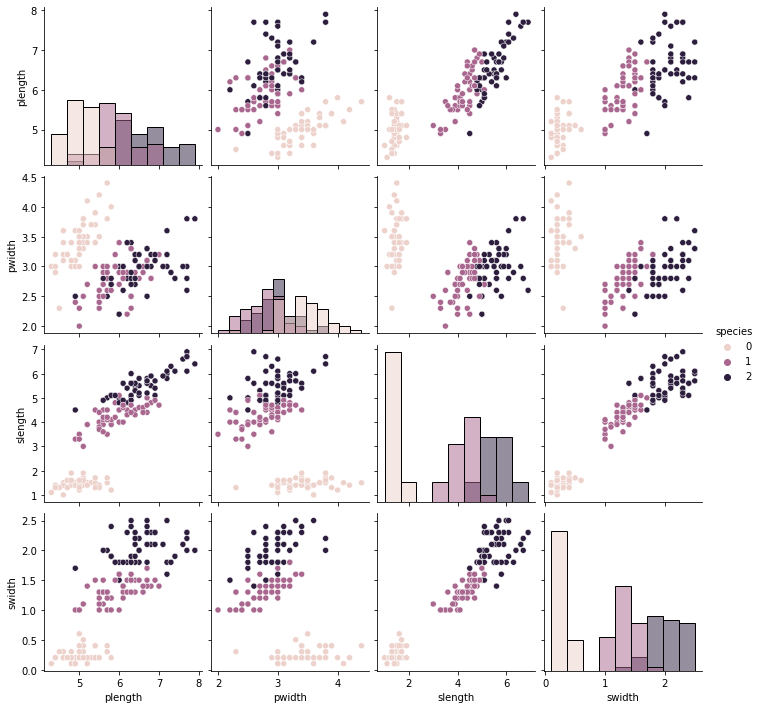

In [139]:
sns.pairplot(data,hue='species',diag_kind='hist')

<AxesSubplot:>

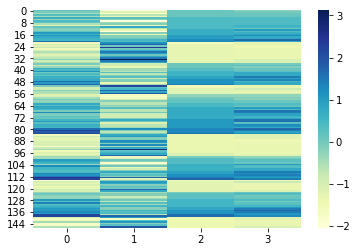

In [103]:
sns.heatmap(data,cmap="YlGnBu")

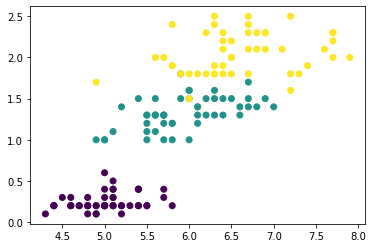

In [137]:
plt.scatter(data['plength'],data['swidth'],c=data['species'])

In [ ]:
plt.scatter(data['plength'],data['swidth'],c=data['species'])

In [109]:
y=data['species']
data.drop(['species'],inplace=True,axis=1)
x=data

In [110]:
x.head()



,plength,pwidth,slength,swidth
0,5.1,2.5,3.0,1.1
1,5.0,2.0,3.5,1.0
2,5.7,2.6,3.5,1.0
3,6.0,2.2,4.0,1.0
4,5.8,2.6,4.0,1.2


In [111]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: species, Length: 150, dtype: int64

In [121]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [114]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=7,test_size=0.33)

In [116]:
model=XGBClassifier()
model.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
pre=model.predict(X_test)
pre = [round(value) for value in pre]

In [130]:
acc=accuracy_score(y_test,pre)
print("accuracy:",acc*100.0)

accuracy: 90.0


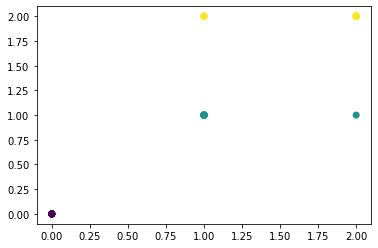

In [131]:
plt.scatter(pre,y_test,c=[y_test])